# Mini Projeto 1

## André Ejzenmesser
____

## Peso do coração dos gatos

Neste trabalho, deve ser estudado uma váriavel quantitativa, e no caso, a váriavel escolhida é o peso do coração dos gatos

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/AndreEjz/Desktop/CD/MiniProjeto1


In [3]:
#Importando a base de dados dos gatos
importando = pd.read_csv("cats.csv", sep=",")

In [4]:
gato = pd.DataFrame()

___
## Itens 1-4

In [5]:
gato['sexo'] = importando.Sex
gato['coracao'] = importando.Hwt
gato.head(15)

,sexo,coracao
0,F,7.0
1,F,7.4
2,F,9.5
3,F,7.2
4,F,7.3
5,F,7.6
6,F,8.1
7,F,8.2
8,F,8.3
9,F,8.5


In [6]:
pesos = []
for i in gato.coracao:
    pesos.append(i)
    
pesos.sort()

In [7]:
gato.describe()

,coracao
count,144.000000
mean,10.630556
std,2.434636
min,6.300000
25%,8.950000
50%,10.100000
75%,12.125000
max,20.500000


In [8]:
delta_i = (gato.coracao.max()-gato.coracao.min())/np.sqrt(144)

print(delta_i)

1.18333333333


In [9]:
#Aredondando o valor do delta
delta_i = 1.3

In [10]:
faixa = np.arange(6,22,delta_i)

In [11]:
faixa_peso = pd.cut(gato.coracao,faixa)
faixa_peso.value_counts()

(9.9, 11.2]     32
(8.6, 9.9]      32
(11.2, 12.5]    22
(7.3, 8.6]      19
(12.5, 13.8]    14
(6, 7.3]        10
(13.8, 15.1]     9
(15.1, 16.4]     3
(16.4, 17.7]     2
(20.3, 21.6]     1
(19, 20.3]       0
(17.7, 19]       0
Name: coracao, dtype: int64

In [12]:
pesos = pd.Series(data=sorted(gato.coracao))

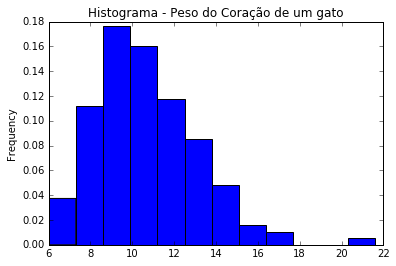

In [13]:
plot = pesos.plot.hist(bins=faixa,title='Histograma - Peso do Coração de um gato',normed=True)

## Item 4

O histograma tem um comportamento de uma leve assimetria positiva pois,observando o histograma, é possível dizer que a mediana esta mais a direita que a média de todos os valores.

### Distribuições Teóricas
#### Primeira
   A primeira distribuição que descreve o comportamento do histograma é a <font color='red'>Inverse Gaussian</font> pois sua curva tem um comportamento muito parecido com o do histograma
   <img src="normal.png">
#### Segunda
   A segunda distribuição que descreve o comportamento do histograma é a <font color='red'>GAMA</font> pois seu comportamento também é bem parecido com a do histograma, porém ela no começo sobe até o valor máximo e depois desce e vai ganhando um comportamento tendendo a zero, e podendo se igualar a zero.
   <img src="gama.png">

___
## Itens 5-11

### Item 5

Caso seja a função normal, os valores dos parâmetros serão algo próximo de 10 que é onde a média deve estar e o outro parâmetro será o desvio padrão calculado, elevado ao quadrado, resultando assim na variância.

Caso seja a função gama, os valores dos parâmetros serão os de inclinação e o formato da função, para estimar eles, é necessário utilizar (suponde que os parametros sejam a e b) a*b=média

Supondo que a = 1,1

In [14]:
#Função normal
media = sum(pesos)/len(pesos)

#Calculando a variância
soma = 0
for i in pesos:
    soma+=(i-media)**2
n = len(pesos)
variancia = soma/n
print('Média:',media,'\nVariância:',variancia)

Média: 10.6305555556 
Variância: 5.88628858025


In [15]:
#Função gama
# k para a gamma é escolhido entre 1 e 2 baseado na forma do histograma e no efeito que k tem na forma da gamma
a = 1.1

# Estimamos theta da distribuição gamma
b = media/a

print(b)

9.66414141414


___
### Item 6

#### Para a curva normal:

In [16]:
param_normal = stats.norm.fit(pesos)

media = param_normal[0]
desv_pad = param_normal[1]

#### Para a curva gama:

In [17]:
param_gama = stats.gamma.fit(pesos)

loc_gama = param_gama[0]
k_gama = param_gama[1]
teta_gama = param_gama[2]

#### Para a curva lognorm:

In [44]:
param_gauss = stats.invgauss.fit(pesos)
mu_gauss = param_gauss[0]
loc_gauss = param_gauss[1]
scale_gauss = param_gauss[2]

___
### Item 7

Usando os valores obido no item 6

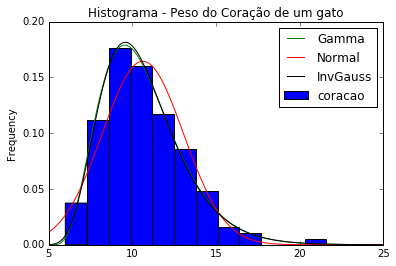

In [45]:
x = np.linspace(5, 25, 10000)

loc = param_gama[0]

gato.coracao.plot.hist(bins=faixa,title='Histograma - Peso do Coração de um gato',normed=True)
normal = stats.norm.pdf(x, scale=desv_pad, loc=media)
gamma = stats.gamma.pdf(x, scale=teta_gama, loc=loc_gama, a=k_gama)
gauss = stats.invgauss.pdf(x, scale=scale_gauss, loc=loc_gauss, mu=mu_gauss)


plt.plot(x, gamma, '-', color='green', label="Gamma") # Plota a gamma teórica
plt.plot(x, normal, '-', color='red', label="Normal") # Plota a normal teórica
plt.plot(x, gauss, '-', color='k', label="InvGauss") # Plota a invgauss teórica

plt.legend()




___
### Item 8

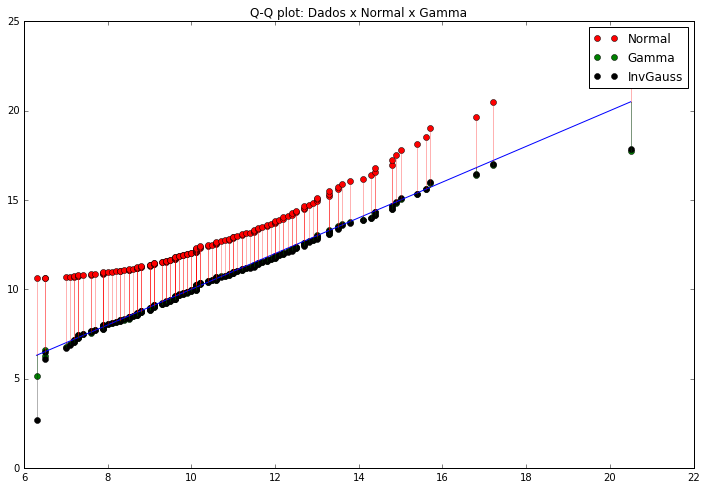

In [49]:
fra = [] # frequencia relativa acumulada
for i in range(len(pesos)):
    acc = (i - 0.5) / len(pesos)
    if acc < 0:
        acc = 0
    fra.append(acc)

# Convertemos fra em uma Series do Pandas
fra = pd.Series(data=fra)

# Gera os valores dos quantis teóricos para as distribuições analisadas
q_norm = stats.expon.ppf(fra, scale=desv_pad, loc=media) # quantis teóricos da exponencial
q_gamma = stats.gamma.ppf(fra, scale=teta_gama, loc=loc_gama, a=k_gama)
q_gauss = stats.invgauss.ppf(fra, mu=mu_gauss,scale=scale_gauss,loc=loc_gauss)


fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Normal x Gamma")

norm_plot, = plt.plot(pesos, q_norm, 'o', color="red", label="Normal")
gamma_plot, = plt.plot(pesos, q_gamma, 'o', color="green", label = "Gamma")
gauss_plot, = plt.plot(pesos, q_gauss, 'o', color="black", label = "InvGauss")

plt.legend(handles=[norm_plot, gamma_plot,gauss_plot])
plt.plot((min(pesos), max(pesos)), (min(pesos), max(pesos)), '-')


for i in range(len(gato.coracao)):
    plt.plot((pesos[i], pesos[i]), (q_norm[i], pesos[i]), '-', color='red', alpha=0.3  )
    plt.plot((pesos[i], pesos[i]), (q_gamma[i], pesos[i]), '-', color='green', alpha=0.3  )
    plt.plot((pesos[i], pesos[i]), (q_gauss[i], pesos[i]), '-', color='black', alpha=0.3  )




Esse gráfico mostra a diferença entre os quantis teóricos e os dados reais da distribuição analisada. Quanto mais distante o ponto estiver da reta real (reta azul no caso), mais distante estará a realidade do teórico.

##### Teste de aderência:

In [51]:
#Erro quadrático:
erro_quadratico_normal = sum((pesos - q_norm)**2)
erro_quadratico_gamma = sum((pesos - q_gamma)**2)
erro_quadratico_gauss = sum((pesos - q_gauss)**2)

print("Erro quadrático da normal: {:4.3f}".format(erro_quadratico_normal))
print("Erro quadrático da gamma: {:4.3f}".format(erro_quadratico_gamma))
print("Erro quadrático da invgauss: {:4.3f}\n".format(erro_quadratico_gauss))

#Erro quadrático médio:
eqm_norm = erro_quadratico_normal/len(pesos)
eqm_gamma = erro_quadratico_gamma/len(pesos)
eqm_gauss = erro_quadratico_gauss/len(pesos)

print("Erro quadratico médio da normal:", eqm_norm)
print("Erro quadratico médio da gamma:", eqm_gamma)
print("Erro quadratico médio da invgauss:", eqm_gauss)

Erro quadrático da normal: 823.087
Erro quadrático da gamma: 11.385
Erro quadrático da invgauss: 22.716

Erro quadratico médio da normal: 5.71587895997
Erro quadratico médio da gamma: 0.0790613795548
Erro quadratico médio da invgauss: 0.157746828396


De acordo com os dados analisados, fica claro que a diferença entre os dados e valores teróricos é menor quando se trata da curva de gamma. Com isso, é possível concluir que a curva gamma tem um comportamento mais adequado que a curva normal, neste caso. Ou seja, gamma tem mais aderência que a normal.

Para fazer a confirmação será usado também o método de soma de diferenças, visto a seguir:

In [52]:
soma_diferenças_normal = sum(abs(pesos - q_norm))
soma_diferenças_gamma = sum(abs(pesos - q_gamma))
soma_diferenças_gauss = sum(abs(pesos - q_gauss))

print("Soma de diferenças da normal :", soma_diferenças_normal)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)
print("Soma de diferenças da invgauss :", soma_diferenças_gauss)

Soma de diferenças da normal : 334.788681275
Soma de diferenças da gamma : 19.1271627338
Soma de diferenças da invgauss : 21.6762102959


Com o novo teste, ainda é possível perceber que a curva de gamma continua tendo mais aderência que a curva da normal.

___
### Item 9

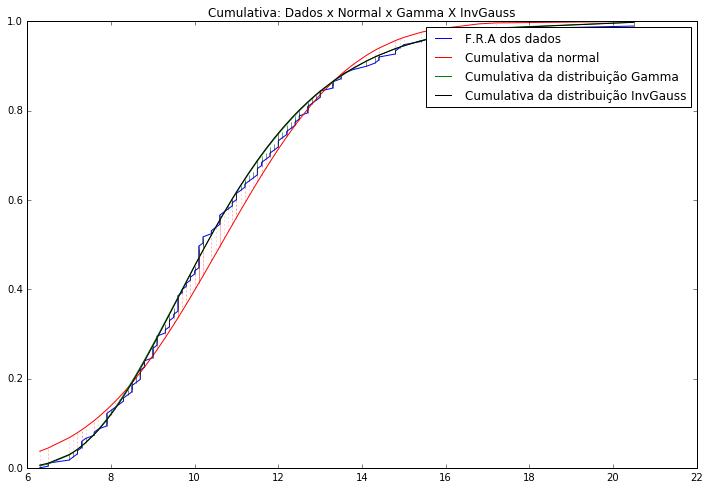

In [54]:
# fra e FDA
cdf_normal = stats.norm.cdf(pesos, scale=desv_pad,loc=media) #FDA
cdf_gamma = stats.gamma.cdf(pesos, scale=teta_gama, loc=loc_gama, a=k_gama)
cdf_gauss = stats.invgauss.cdf(pesos, scale=scale_gauss, loc=loc_gauss, mu=mu_gauss)


fig = plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Normal x Gamma X InvGauss")

dados_fra_plot, = plt.plot(pesos, fra, '-', color='blue', label="F.R.A dos dados")
cdf_norm_plot,   = plt.plot(pesos, cdf_normal, '-', color='red', label = "Cumulativa da normal")
cdf_gamma_plot, = plt.plot(pesos, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")
cdf_gauss_plot, = plt.plot(pesos, cdf_gauss, '-', color='k', label = "Cumulativa da distribuição InvGauss")

plt.legend(handles=[dados_fra_plot, cdf_norm_plot, cdf_gamma_plot, cdf_gauss_plot])


for i in range(len(gato.coracao)):
    plt.plot((pesos[i], pesos[i]), (fra[i], cdf_normal[i]), ':', color="red", alpha=0.3)   
    plt.plot((pesos[i], pesos[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    plt.plot((pesos[i], pesos[i]), (fra[i], cdf_gauss[i]), '--', color="k", alpha=0.3)
    

___
### Item 10

In [55]:
# Erro quadrático nas CDFs
erro_quad_cdf_normal = sum((fra - cdf_normal)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

erro_quad_cdf_gauss = sum((fra - cdf_gauss)**2)

print("Erro quadrático da CDF da Normal versus F.R.A", erro_quad_cdf_normal)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)
print("Erro quadrático da CDF da InvGauss versus F.R.A", erro_quad_cdf_gauss)

Erro quadrático da CDF da Normal versus F.R.A 0.164301229389
Erro quadrático da CDF da Gamma versus F.R.A 0.0306673717708
Erro quadrático da CDF da InvGauss versus F.R.A 0.0306231435015


Pelos dados observados, é possível concluir que como o erro quadrático é menor no caso gamma, ela então, é portanto a que oferece o melhor ajuste.

In [59]:
# Kolmogorov-Smirnov goodness-of-fit test
ks_aderencia_norm = max(abs(fra-cdf_normal))
ks_aderencia_gamma = max(abs(fra-cdf_gamma))
ks_aderencia_gauss = max(abs(fra-cdf_gauss))


print("Teste K-S para a normal com μ= {:4.2f}: {:4.3f}\n\
Teste K-S para a gamma com scale={:4.3f}, loc=6 e a={:4.3f}: {:4.3f}".format(media, ks_aderencia_norm, param_gama[2], param_gama[1], ks_aderencia_gamma))
print("Teste K-S para a invgauss com scale=",scale_gauss,"loc=",loc_gauss,"mu=",mu_gauss,":", ks_aderencia_gauss)

Teste K-S para a normal com μ= 10.63: 0.088
Teste K-S para a gamma com scale=1.079, loc=6 e a=5.100: 0.031
Teste K-S para a invgauss com scale= 84.084252288 loc= 2.67930226597 mu= 0.0945629335679 : 0.032506563055


Como pelo teste K-S, o valor resultante de gamma foi menor que o da normal, então a curva de gamma é a que melhor descreve o comportamento dos dados estudados.